In [92]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adamax
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report


In [94]:
train_dir = 'C:\\Users\\DELL\\Desktop\\emotion\\train'
test_dir = 'C:\\Users\\DELL\\Desktop\\emotion\\test'

In [96]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [98]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [100]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  
    batch_size=32,
    class_mode='categorical'
)

Found 28709 images belonging to 7 classes.


In [102]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 7178 images belonging to 7 classes.


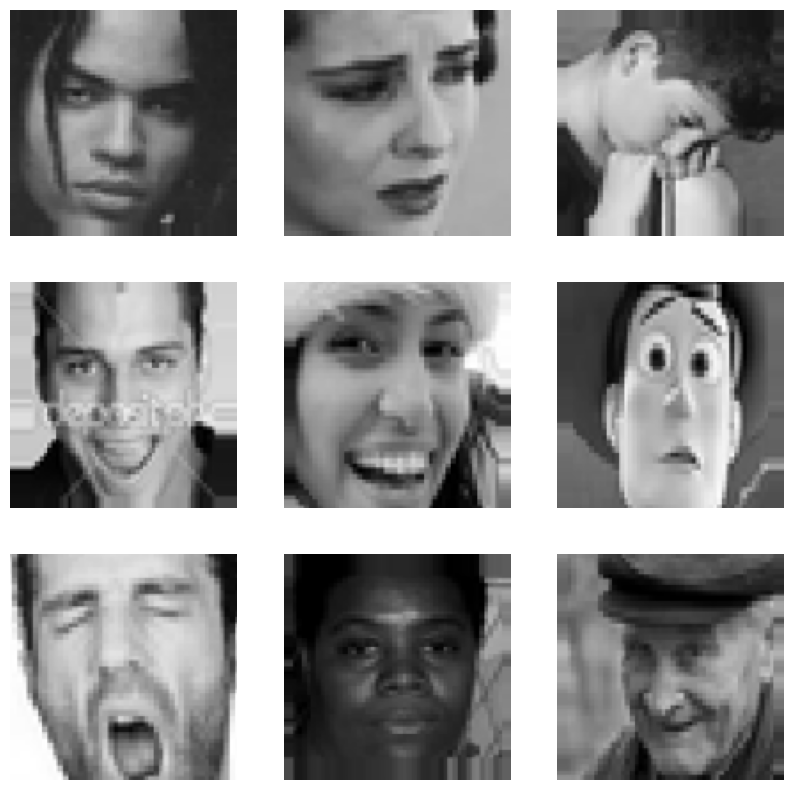

In [104]:
for data_batch, labels_batch in train_generator:
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(data_batch[i])
        plt.axis('off')
    plt.show()
    break 

In [112]:
import keras

model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=64, kernel_size=5, strides=1, padding="same", activation="relu", input_shape=(128, 128, 3)))
model.add(keras.layers.MaxPool2D(pool_size=2))

model.add(keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=2))

model.add(keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(512, activation="relu"))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(7, activation="softmax"))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 128, 128, 64)   │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │    16,777,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,070,599 (65.12 MB)

 Trainable params: 17,070,599 (65.12 MB)

 Non-trainable params: 0 (0.00 B)

In [114]:
model.compile(optimizer=Adamax(), loss='categorical_crossentropy', metrics=['accuracy'])

In [116]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50
)

Epoch 1/50


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


897/897 ━━━━━━━━━━━━━━━━━━━━ 353s 391ms/step - accuracy: 0.2857 - loss: 1.7504
Epoch 2/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 62us/step - accuracy: 0.3438 - loss: 0.8343   
Epoch 3/50


C:\Users\DELL\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


897/897 ━━━━━━━━━━━━━━━━━━━━ 361s 402ms/step - accuracy: 0.4317 - loss: 1.4752
Epoch 4/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 22us/step - accuracy: 0.5938 - loss: 0.6430   
Epoch 5/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 356s 396ms/step - accuracy: 0.4851 - loss: 1.3409
Epoch 6/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 33us/step - accuracy: 0.5000 - loss: 0.6716   
Epoch 7/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 354s 394ms/step - accuracy: 0.5170 - loss: 1.2567
Epoch 8/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 37us/step - accuracy: 0.6250 - loss: 0.5595   
Epoch 9/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 353s 393ms/step - accuracy: 0.5412 - loss: 1.2047
Epoch 10/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 34us/step - accuracy: 0.4688 - loss: 0.5711   
Epoch 11/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 353s 393ms/step - accuracy: 0.5721 - loss: 1.1309
Epoch 12/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 19us/step - accuracy: 0.4688 - loss: 0.6205   
Epoch 13/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 356s 396ms/step - accuracy: 0.5891 - loss: 1.0876
Epoch 14/50
897/8

In [118]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 128, 128, 64)   │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │    16,777,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,211,799 (195.36 MB)

 Trainable params: 17,070,599 (65.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 34,141,200 (130.24 MB)

In [120]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test accuracy: {test_acc}')

224/224 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.5577 - loss: 1.7033
Test accuracy: 0.6109095811843872


In [122]:
# Reset the test data generator
test_generator.reset()

# Predicting on test data
pred = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
predicted_class_indices = np.argmax(pred, axis=1)

# True labels
true_class_indices = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Ensure lengths match
if len(true_class_indices) != len(predicted_class_indices):
    predicted_class_indices = predicted_class_indices[:len(true_class_indices)]

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(true_class_indices, predicted_class_indices)
class_report = classification_report(true_class_indices, predicted_class_indices, target_names=class_labels)

print('Confusion Matrix')
print(conf_matrix)
print('\nClassification Report')
print(class_report)




225/225 ━━━━━━━━━━━━━━━━━━━━ 22s 98ms/step
Confusion Matrix
[[ 479    6   86   76  108  168   35]
 [  32   55    5    4    4   11    0]
 [ 108    0  422   58  123  209  104]
 [  58    0   46 1403  113   86   68]
 [ 113    2   54  117  721  204   22]
 [ 140    4  124   78  215  649   37]
 [  31    1   58   31   26   28  656]]

Classification Report
              precision    recall  f1-score   support

       angry       0.50      0.50      0.50       958
   disgusted       0.81      0.50      0.61       111
     fearful       0.53      0.41      0.46      1024
       happy       0.79      0.79      0.79      1774
     neutral       0.55      0.58      0.57      1233
         sad       0.48      0.52      0.50      1247
   surprised       0.71      0.79      0.75       831

    accuracy                           0.61      7178
   macro avg       0.62      0.58      0.60      7178
weighted avg       0.61      0.61      0.61      7178



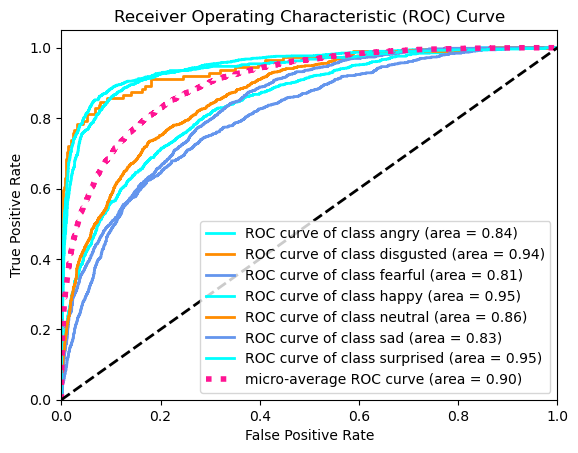

In [124]:
from sklearn.preprocessing import label_binarize
from itertools import cycle
true_class_indices = label_binarize(true_class_indices, classes=range(len(class_labels)))
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(class_labels)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_class_indices[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(true_class_indices.ravel(), pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(class_labels[i], roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4,
         label='micro-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc["micro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


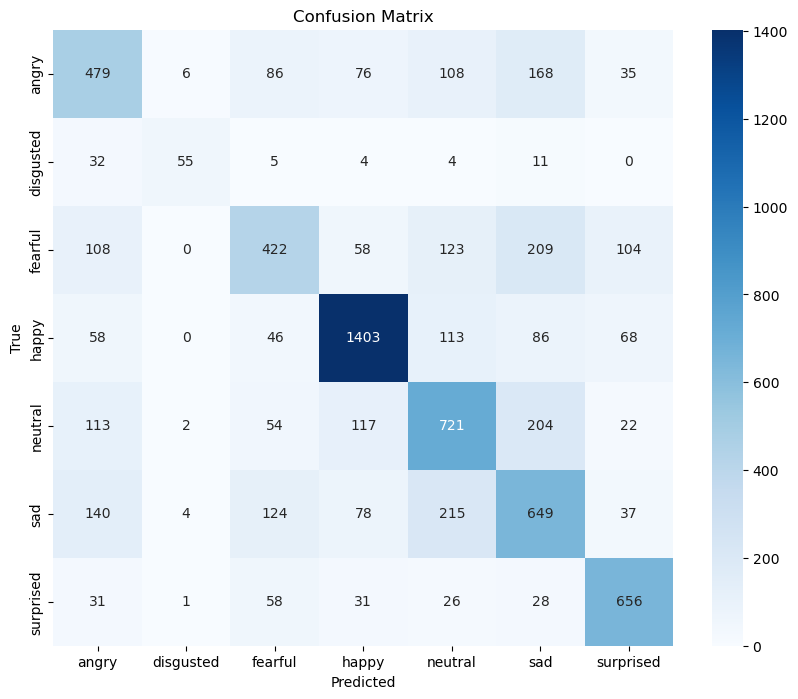

In [126]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
